In [35]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
rc('font',**{'family':'serif','serif':['Computer Modern']},size = 14)
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

def createCircularMask(shape, radius=4, center=None):
        """
        Returns a 2D boolean mask given some radius and location
        Parameters
        -------------
        shape : arr
            Shape of a 2D numpy array
        radius : int
            Radius of the mask in pixels
        center : (int,int)
            Pixel coordinates denoting the center of the mask, None is the center of shape
        """
        w = shape[0]
        h = shape[1]
        if center is None: 
            center = [int(w/2), int(h/2)]
        if radius is None:
            radius = min(center[0], center[1], w-center[0], h-center[1])
        X, Y = np.ogrid[:w, :h]
        dist2 = (X - center[0])**2 + (Y-center[1])**2
        mask = dist2 <= radius**2
        return mask

In [84]:
hdul = fits.open("HD131399_pacosnr.fits")
data = np.array(hdul[0].data)

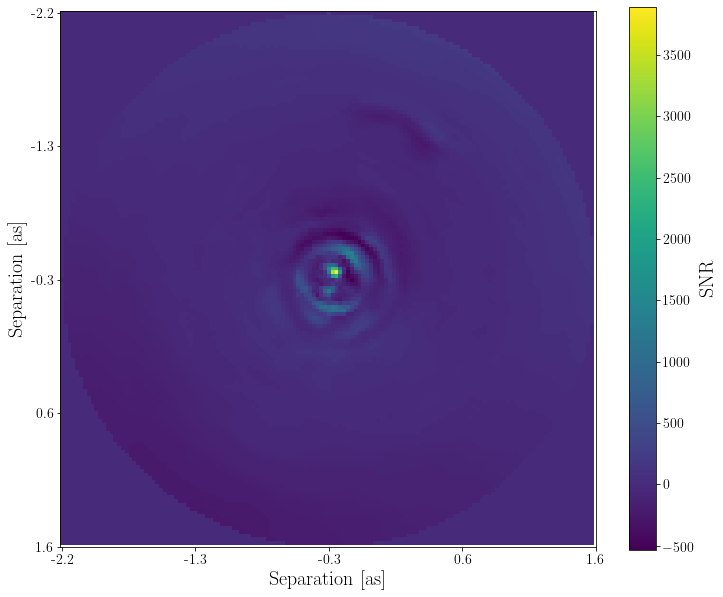

In [85]:
nlabels = 5
pixscale = 0.027

midx = int(data.shape[0]/2)
midy = int(data.shape[1]/2)
data = data[midx-70:midx+70,midy-70:midy+70]
#data[data<0] = 0
#data[data>500] = 500
mask = createCircularMask(data.shape,70)

xax = (np.arange(data.shape[0]+1) - midx)*pixscale
yax = (np.arange(data.shape[1]+1) - midy)*pixscale

xticlocs = np.linspace(0,data.shape[0],nlabels,dtype = int)
xticlabels = xax[xticlocs]
yticlocs = np.linspace(0,data.shape[1],nlabels,dtype = int)
yticlabels = yax[yticlocs]


fig,ax = plt.subplots(figsize=(12,10))
im = ax.imshow(np.nan_to_num(data*mask))
ax.set_xlabel("Separation [as]",fontsize = 20)
ax.set_ylabel("Separation [as]",fontsize = 20)
ax.set_xticks(xticlocs)
ax.set_xticklabels(["%.1f" % num for num in xticlabels],fontsize = 14)
ax.set_yticks(yticlocs)
ax.set_yticklabels(["%.1f" % num for num in yticlabels],fontsize = 14)
c = fig.colorbar(im,ax = ax,)
c.set_label(label = "SNR",fontsize = 20)
#fig.savefig("HD131399.pdf")